In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import * 
import sympy as sp

dynamic verify for MD-state and Car, because both experiment measuring force from MD-state and Car are locked-rotor force, while in theorical fitting, the spring coefficient Ka, Kb are both get from free-rotor force, so I pressume there's a big diff between theorical and experimental result, maybe the experimental data will be much bigger than theorical data

now is the MD state part

experimental data 

In [9]:
P_ex = np.array([0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45,50])*1000

force1_ex = np.array([0,0.50,1.25,1.98,2.51,3.1,3.63,4.08,4.51,4.80,5.00])
# back 4, Fi = 0.11
force2_ex= np.array([0,0.50,1.25,1.94,2.52,3.10,3.55,4.00,4.41,4.67,4.85])
# back 3, Fi = 0.11
force3_ex = np.array([0,0.55,1.23,1.96,2.61,3.19,3.71,4.19,4.46,4.66,4.78])

force_ex = (force1_ex + force2_ex + force3_ex)/3

now is the theorical data, from single OT-SPA we use the 3D theory plane, because the experimental data is locked-rotor torque, meaning the rotational angle of OT-SPA is fix, and output torque only changes with P, thus I fecth the intersectional line between the plane and angle = 0 plane.

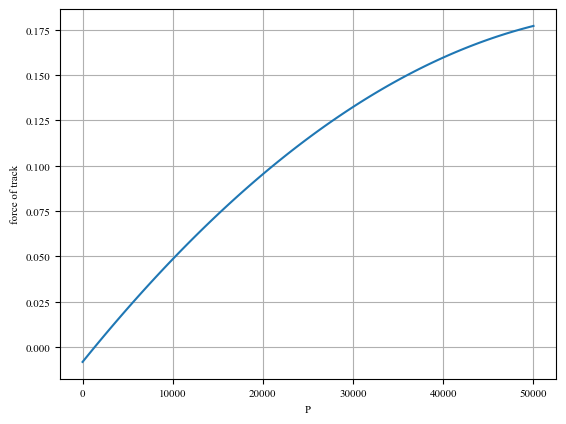

In [10]:
theta = sp.symbols('theta')
P_t = -np.linspace(0,50*1000,100)
#P_t = []

#with open('D:/HSH_BackUp/research/actuator_model/P1.txt') as f:
#    for line in f.readlines():
 #       P_t.append(float(line))
Torque_t = np.array([])
#
for i in range(len(P_t)):
        t = 0.07268 -0.04813*((P_t[i]+2.404e+04)/1.035e+04) -0.04018*((0-22.36)/14.4) -0.005256*((P_t[i]+2.404e+04)/1.035e+04)**2 -0.005677*((P_t[i]+2.404e+04)/1.035e+04 * (0-22.36)/14.4) -0.009771*((0-22.36)/14.4)**2
        Torque_t = np.append(Torque_t, t)
        

force_t = ((Torque_t-Torque_t[0])/(23.7/1000))

plt.plot(-np.array(P_t), Torque_t)
plt.xlabel('P')
plt.ylabel('force of track')
plt.grid()
plt.show()

put them together

<Figure size 640x480 with 0 Axes>

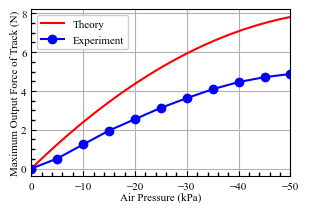

In [11]:
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
plt.figure(figsize=(8.49/2.54,5.5/2.54))


plt.plot(P_t/1000, force_t,'r',label = 'Theory')
plt.plot(-P_ex/1000,force_ex,'o-b',label = 'Experiment')
plt.legend(title='', loc='upper left', framealpha=1)
plt.xlabel('Air Pressure (kPa)',labelpad=0.5)
plt.ylabel('Maximum Output Force of Track (N)',labelpad=0.5)
plt.grid()
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
# plt.grid(linestyle='--')
plt.rcParams.update({'font.size':8})
plt.xlim(0, -50)
#plt.ylim(0, 7)
plt.savefig('Track Force-P-verify.svg',format = "svg", dpi=300)

plt.show()

Car traction force of 3 cycles, the same as above, first start with experimental data

In [12]:
P1_ex = np.array([20,25,30,35,40])*1000
traction_ex = np.array([(7.29+7.14+7.82+7.09+6.92)/5, (11.22+11.58+11.5+11.21+11.17)/5, 
(12.76+13.28+13.48+14.45+13.33)/5, (14.37+14.78+14.91+15+15.03)/5, (15.4+15.32+16.04+14.97+15.67)/5])


theorical traction force of car

In [13]:
num = 4 # 4 OT-SPA produce torque at the same time in a cycle

traction_t = (Torque_t[40:80]/(23.7/1000))*num

put them together, bigger, omit the internel fiction.

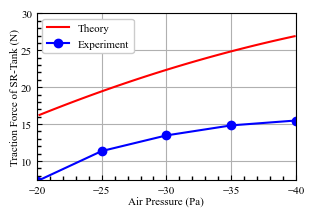

In [14]:
plt.figure(figsize=(8.49/2.54,5.5/2.54))
plt.plot(P_t[40:80]/1000, traction_t,"r",label = 'Theory')
plt.plot(-P1_ex/1000,traction_ex,'o-b',label = 'Experiment')
plt.legend(title='', loc='upper left', fontsize=8, title_fontsize=7, framealpha=1)
plt.xlabel('Air Pressure (Pa)',labelpad=0.5)
plt.ylabel('Traction Force of SR-Tank (N)',labelpad=0.5)
plt.grid()
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
plt.tick_params(\
    axis='x',#设置x轴
    direction='in',# 小坐标方向，in、out
    which='both',      # 主标尺和小标尺一起显示，major、minor、both
    bottom=True,      #底部标尺打开
    top=False,         #上部标尺关闭
    labelbottom=True #x轴标签打开
    ) 
plt.tick_params(\
    axis='y',
    direction='in',
    which='both',
    left=True,
    right=False,
    labelbottom=True
    )
plt.xlim(-20, -40)
plt.ylim(7.4, 30)

plt.savefig('Traction Force-P-verify.svg',format = "svg",dpi =300)
plt.show()